### Exploring Hidden Layer Representations in Neural Networks with PCA and t-SNE


In this assignment, we will investigate how neural networks represent information in their hidden layers, comparing networks with trained versus untrained parameters. Using unsupervised learning techniques, specifically Principal Component Analysis (PCA) and t-SNE, we will visualize the hidden layer outputs in two dimensions.

Through these visualizations, you will explore and analyze two key aspects:
1. The distinctions between PCA and t-SNE as dimensionality reduction techniques.
2. The differences in the learned representations of hidden layers before and after training.

This analysis will help you gain insights into how training affects feature learning and dimensionality reduction. We will use the MNIST dataset for this task, but similar results can be observed with other datasets.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from sklearn.datasets import fetch_openml
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.neural_network import MLPClassifier
    import plotly.express as px
    from sklearn.manifold import TSNE
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    import seaborn as sns
except ImportError as e:
    import subprocess
    import sys
    
    print(f"Missing package: {str(e).split()[-1]}")
    print("Installing required packages...")
    %pip install scikit-learn
    %pip install seaborn


##### We will use the MNIST dataset to compare representations in the hidden layers of a neural network. Follow these steps to load, scale, and split the dataset.


In [10]:
# Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
# Convert X and y to pandas DataFrames
X = pd.DataFrame(X, columns=[f'pixel_{i}' for i in range(X.shape[1])])
y = pd.Series(y, name='label')

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)


##### The cell below defines a function that creates an MLP (Multi-Layer Perceptron) classifier with preset parameters.

##### **You should use the `get_mlp_classifier()` function below to create the MLP classifiers for this homework.**

The classifier is configured with:
- One hidden layer of 100 neurons
- ReLU activation function
- Adam optimizer
- 20 maximum iterations
- Random state of 42 for reproducibility


In [11]:
def get_mlp_classifier(max_iter=20):
    return MLPClassifier(
        hidden_layer_sizes=(200,),  # One hidden layer with 100 neurons
        activation='relu',
        solver='adam',
        max_iter=max_iter,
        random_state=42,
        verbose=False
)


`get_untrained_hidden_layer_outputs` creates a new classifier and then computes the outputs of the hidden layer with the test set as an input.

The outputs of a neural network hidden layer are intermediate representations of the input data
after being transformed by the layer's weights and activation function. These outputs capture
learned features and patterns from the input data.

The resulting values represent abstract features that the network uses for its final prediction



In [12]:
def get_untrained_hidden_layer_outputs():
    mlp_classifier= get_mlp_classifier(1)
    single_X=np.random.uniform(0, 1, size=(1, 784))
    single_y=[1]
    single_X = X_train[0:1]  # Take first sample
    single_y = y_train[0:1]  # Take first label

    mlp_classifier.partial_fit(single_X, single_y, classes=np.unique(y_train))


        
    intermediate_output = X_test @ mlp_classifier.coefs_[0]
    intermediate_output = np.maximum(0, intermediate_output)
    return intermediate_output


`get_trained_hidden_layer_outputs` creates a new classifier, trains it on the full training set, and then computes the outputs of the hidden layer with the test set as input.
Similar to the untrained version, this function:
1. Creates an MLPClassifier with default parameters (20 max iterations)
2. Trains the classifier on X_train and y_train using fit()
3. Computes the hidden layer outputs by:
   - Multiplying input data (X_test) with the first layer weights (coefs_[0])
   - Applying ReLU activation (max(0,x)) to the result
The key difference is that this classifier is fully trained, so its hidden layer representations
should be more meaningful for distinguishing between different digit classes.


In [13]:
def get_trained_hidden_layer_outputs():
    mlp_classifier= get_mlp_classifier()
    # mlp_classifier.fit(single_X, )
    mlp_classifier.fit(X_train, y_train)
        
    intermediate_output = X_test @ mlp_classifier.coefs_[0]
    intermediate_output = np.maximum(0, intermediate_output)
    return intermediate_output

### **Part 1A**
##### Extract the outputs from the hidden layer of an *untrained* MLPClassifier and apply t-SNE to the hidden layer outputs to represent the data in 2D

1. get the outputs from `get_untrained_hidden_layer_outputs()` and apply t-SNE to visualize the results
2. Create a scatter plot of the 2D t-SNE results
3. Color code the points based on their class labels (`y_test.astype(int)`)
4. Add a colorbar to identify different classes




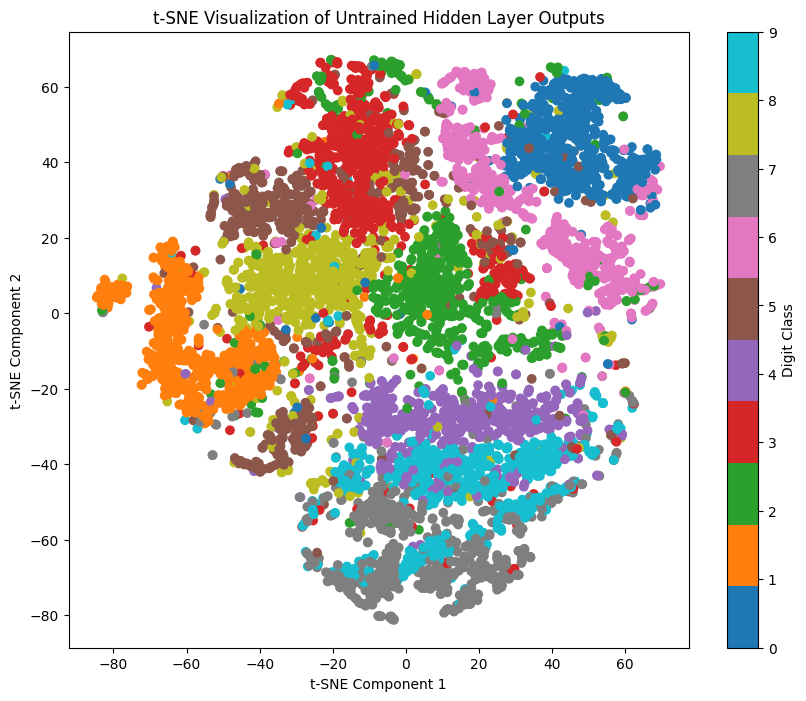

In [14]:
#Provide your code below
# Get untrained hidden layer outputs
untrained_outputs = get_untrained_hidden_layer_outputs()

# Apply t-SNE to reduce to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(untrained_outputs)

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], 
                     c=y_test.astype(int), cmap='tab10')
plt.colorbar(scatter, label='Digit Class')
plt.title('t-SNE Visualization of Untrained Hidden Layer Outputs')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


### **Part 1B**
##### Now, extract the outputs from the hidden layer of an *untrained* MLPClassifier and apply PCA instead of t-SNE

1. get the outputs from `get_untrained_hidden_layer_outputs()` and apply PCA to visualize the results
2. Create a scatter plot of the 2D PCA results
3. Color code the points based on their class labels (`y_test.astype(int)`)
4. Add a colorbar to identify different classes




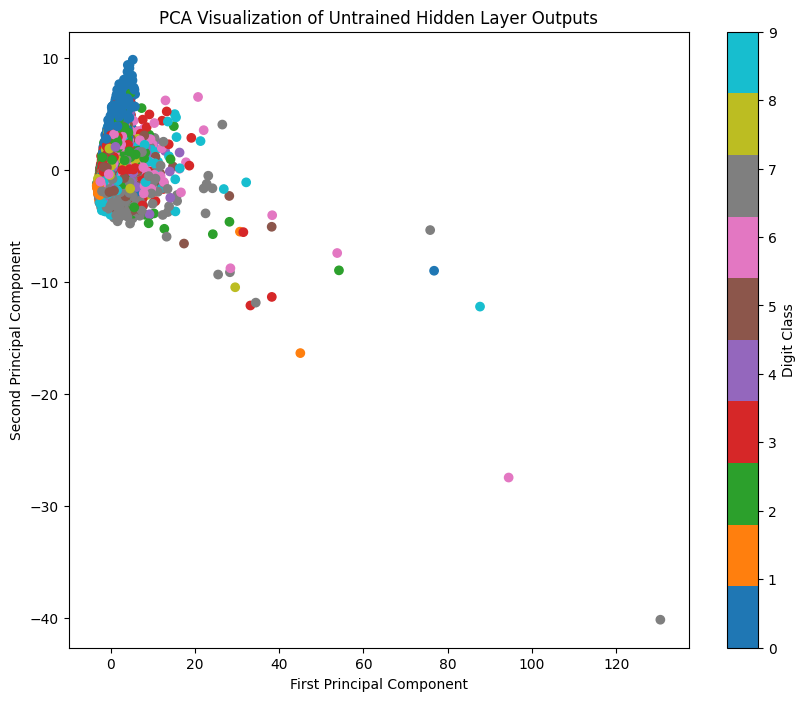

In [15]:
#Provide your code below
# Get untrained hidden layer outputs
untrained_outputs = get_untrained_hidden_layer_outputs()

# Apply PCA to reduce to 2D
pca = PCA(n_components=2,random_state=42)
pca_results = pca.fit_transform(untrained_outputs)

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_results[:, 0], pca_results[:, 1],
                     c=y_test.astype(int), cmap='tab10')
plt.colorbar(scatter, label='Digit Class')
plt.title('PCA Visualization of Untrained Hidden Layer Outputs')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


### **Part 1C**
#### In your own words, describe the difference between lower dimensional representations when using PCA vs t-SNE. Provide your response in the cell below.

PCA seems to have much less depth of sorting than t-SNE, as PCA grouped most datapoints into a narrow column, while t-SNE grouped datapoints into regions where some sorting could already be seen. However, t-SNE was much slower (44.6s) than PCA (0.6s).

### **Part 2A**
##### Extract the outputs from the hidden layer of a *trained* MLPClassifier and apply t-SNE to the hidden layer outputs to represent the data in 2D

1. get the outputs from `get_trained_hidden_layer_outputs()` and apply t-SNE to visualize the results
2. Create a scatter plot of the 2D t-SNE results
3. Color code the points based on their class labels (`y_test.astype(int)`)
4. Add a colorbar to identify different classes




c:\Users\rhino\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


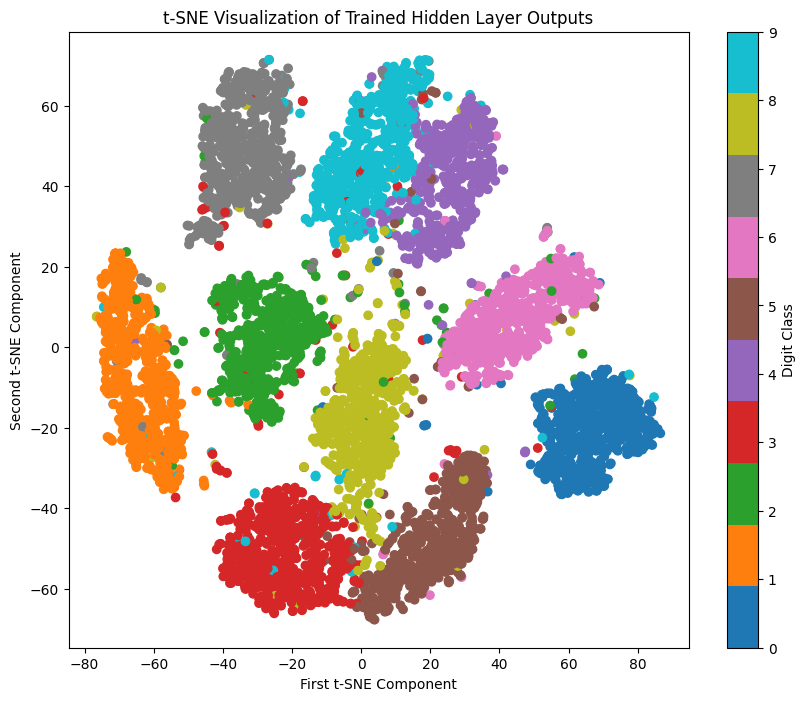

In [19]:
#Provide your code below
# Get trained hidden layer outputs
trained_outputs = get_trained_hidden_layer_outputs()

# Apply t-SNE to reduce to 2D
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(trained_outputs)

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], 
                     c=y_test.astype(int), cmap='tab10')
plt.colorbar(scatter, label='Digit Class')
plt.title('t-SNE Visualization of Trained Hidden Layer Outputs')
plt.xlabel('First t-SNE Component')
plt.ylabel('Second t-SNE Component')
plt.show()


### **Part 2B**
##### Extract the outputs from the hidden layer of an *trained* MLPClassifier and apply PCA to the hidden layer outputs to represent the data in 2D

1. get the outputs from `get_trained_hidden_layer_outputs()` and apply PCA to visualize the results
2. Create a scatter plot of the 2D PCA results
3. Color code the points based on their class labels (`y_test.astype(int)`)
4. Add a colorbar to identify different classes




c:\Users\rhino\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


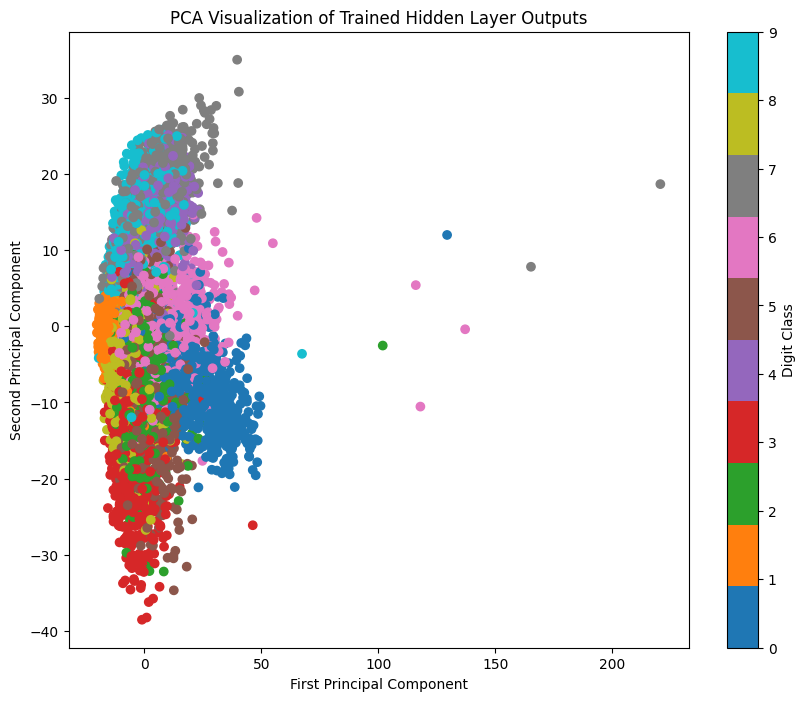

In [20]:
#Provide your code below
# Get trained hidden layer outputs
trained_outputs = get_trained_hidden_layer_outputs()

# Apply PCA to reduce to 2D
pca = PCA(n_components=2)
pca_results = pca.fit_transform(trained_outputs)

# Create scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_results[:, 0], pca_results[:, 1],
                     c=y_test.astype(int), cmap='tab10')
plt.colorbar(scatter, label='Digit Class')
plt.title('PCA Visualization of Trained Hidden Layer Outputs')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


### **Part 2C**
##### In your own words, describe the difference between lower dimensional representations when using PCA vs t-SNE on the trained hidden layer outputs. Provide your response in the cell below.


Once again, PCA has much less depth of sorting. PCA again grouped the vast majority of datapoints into a single column, albiet a taller column than the untrained output. Groups of datapoints could be seen, but overlapped heavily. Meanwhile, t-SNE used most of the plot area, and distinct, separate groupings could be seen. Leftover floating datapoints are likely only a product of scikit reaching its maximum iterations. However, t-SNE was again slower (2m 6.6s) than PCA (1m 31.2s).

### **Part 3**

1. How do the visualizations differ between the trained and untrained hidden layer outputs? What might account for these differences?
2. What differences do you observe between PCA and t-SNE? Why might certain patterns be more pronounced in one method compared to the other?
3. Why might certain clusters or patterns emerge only in the trained model?

Provide your response in the cell below.

1. Untrained outputs resulted in very rough, indistinct groupings of datapoints with overlap between the groups. Trained output could instead create distinct regions of data groupings, with space between to reduce overlapping. This would be due to hidden layers being able to more strongly distinguish between datapoints when trained. Untrained layers might be able to sort data, but not necessarily categorize it.
2. PCA largely creates a single column of data, and as a result overlapping in both the trained and untrained output is very noticeable. However PCA is very fast, likely due to only sorting the data into 1 dimension. Meanwhile, t-SNE uses 2 dimensions and groups data across the entire plot, but is slower. This makes t-SNE better at sorting, but slower.
3. Trained models can allow certain nodes in a neural network to sort for specific characteristics, i.e. more complex data handling. This allows them to group data into categories, rather than simple comparison, which allows for a neural network to create clusters of similar data with separation between clusters.